# Fanni Kiss & Attila Serfőző - Python Term Project

Project GitHub repository: https://github.com/ASerfozo/CEU_Python

Import main packages

In [72]:
import pandas as pd
import seaborn as sns

### Importing the enriched data set from our GitHub repo

- HDRO data: Human Development Report Office Statistical Data API
- CPI data: Transparency International - Corruption Perception Index (CPI)

In [73]:
HDRO_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/HDRO_data.csv')
HDRO_data.head()
for col in HDRO_data.columns:
    print(col)

ISO3
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


In [74]:
CDI_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/CPI_2020.csv')
CDI_data.head()
for col in CDI_data.columns:
    print(col)

Country
ISO3
Region
CPI score 2020
Rank 2020
Sources 2020
Standard error 2020
CPI score 2019
Rank 2019
Sources 2019
Standard error 2019
CPI score 2018
Rank 2018
Sources 2018
Standard error 2018
CPI score 2017
Rank 2017
Sources 2017
Standard error 2017
CPI score 2016
Rank 2016
Sources 2016
Standard error 2016
CPI score 2015
Sources 2015
Standard error 2015
CPI score 2014
Sources 2014
Standard error 2014
CPI Score 2013
Sources 2013
Standard error 2013
CPI Score 2012
Sources 2012
Standard error 2012


Keep only the 2019 and 2016 CPI data

In [75]:
CDI_data = CDI_data[['Country','ISO3','Region','CPI score 2019','Rank 2019','CPI score 2016','Rank 2016']]

### Merging HDI and CPI dataframes using the ISO3 country codes

In [76]:
df1 = pd.merge(CDI_data, HDRO_data, how = 'inner')
for col in df1.columns:
    print(col)

Country
ISO3
Region
CPI score 2019
Rank 2019
CPI score 2016
Rank 2016
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


### Exploratory Data Analysis

#### Regions

AME   - Americas     
AP    - Asia Pacific    
ECA   - Eastern Europe & Central Asia       
MENA  - Middle East & North Africa     
SSA   - Sub-Saharan Africa        
WE/EU - Western Europe & EU  

### Region boxplots about CPI and HDI 2019

Western Europe and the EU perform best overall in the corruption perception index, while East-Europe together with Central Asia  (Turkic countries) is still far from the Western Europe levels. It is also important to notice the large variance in the Asia Pacific and the Americas regions CPI index. In case of Americas the main reason behind is the corruption in South-America compared to the North, while in Asia Pacific the wide variety of political systems cause the difference.

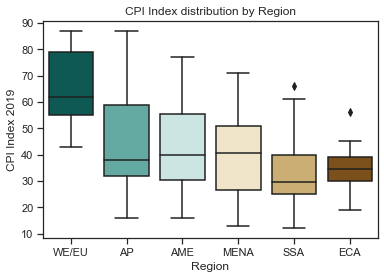

In [191]:
sns.boxplot(data=df1, x = 'Region', y = 'CPI score 2019', palette=("#01665e","#5ab4ac","#c7eae5","#f6e8c3","#d8b365","#8c510a"))

plt.title('CPI Index distribution by Region')
plt.ylabel('CPI Index 2019')
plt.show()

Looking at the Development Index the eye-cathing is the lag of Sub-Saharan Africa compared to the rest of the world.

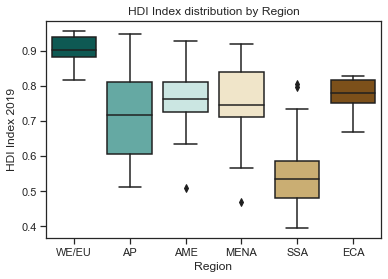

In [190]:
sns.boxplot(data=df1, x = 'Region', y = 'HDI_index-2019', palette=("#01665e","#5ab4ac","#c7eae5","#f6e8c3","#d8b365","#8c510a"))

plt.title('HDI Index distribution by Region')
plt.ylabel('HDI Index 2019')
plt.show()

### Human Development Index vs Corruption Perception Index 2019 interactive scatterplot

In [83]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [84]:
p = figure(plot_width=800, plot_height=600, title = 'Human Development Index vs Corruption Perception Index 2019')

weeu = df1[df1['Region']=='WE/EU']
source = ColumnDataSource(weeu)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#01665e', alpha=0.8, legend='WE/EU',
          muted_color='#01665e', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ap = df1[df1['Region']=='AP']
source = ColumnDataSource(ap)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#5ab4ac', alpha=0.8, legend='AP',
          muted_color='#5ab4ac', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ame = df1[df1['Region']=='AME']
source = ColumnDataSource(ame)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#c7eae5', alpha=0.8, legend='AME',
          muted_color='#c7eae5', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

mena = df1[df1['Region']=='MENA']
source = ColumnDataSource(mena)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#f6e8c3', alpha=0.8, legend='MENA',
          muted_color='#f6e8c3', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ssa = df1[df1['Region']=='SSA']
source = ColumnDataSource(ssa)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#d8b365', alpha=0.8, legend='SSA',
          muted_color='#d8b365', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

eca = df1[df1['Region']=='ECA']
source = ColumnDataSource(eca)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#8c510a', alpha=0.8, legend='ECA',
          muted_color='#8c510a', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

hover = HoverTool(tooltips=[("region", "@Region"),
                            ('country', '@Country')])
p.add_tools(hover)

p.legend.location = "top_left"
p.xaxis.axis_label = 'CPI score'
p.yaxis.axis_label = 'HDI index'
p.legend.click_policy="mute"

show(p)

D:\Programok\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead

D:\Programok\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead

D:\Programok\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead

D:\Programok\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead

D:\Programok\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'l

The scatterplot above shows the regional clusters regarding the two analyzed variables (CPI score and HDI index in 2019). We can see the lag of the Sub-Saharan region compared to the rest of the World. Also it is easy to notice the top right corner allignment of the Western-Europe/Eu countries regarding both indicies. 

### World heatmap of Corruption Perception Index in 2019

We installed the Plotly and Pycountry packages for map creation

In [ ]:
#pip install plotly
#pip install pycountry

In [189]:
import pycountry
import plotly.express as px

fig = px.choropleth(data_frame = df1,
                    locations= "ISO3",
                    color= "CPI score 2019",
                    hover_name= "Country",
                    color_continuous_scale= 'BrBG',)

fig.show()

#### Hovering on a country above shows its CPI score in addition to country name and ISO3 code.

## Task 1
In task 1, we would like to explore the relationship between corruption and the Human Development Index. Firstly, we check the correlation between HDI and the CPI score 2019.

In [85]:
df1['CPI score 2019'].corr(df1['HDI_index-2019'])

0.7567983382062069

The correlation between HDI and corruption score in 2019 is 0.76, which indicates that the two attributes of a given country are moving together.

In [86]:
import matplotlib.pyplot as plt

In [87]:
%matplotlib inline

In [88]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
import seaborn as sns
sns.set(style="ticks")

#### Simlpe linear regression of CPI ~ HDI

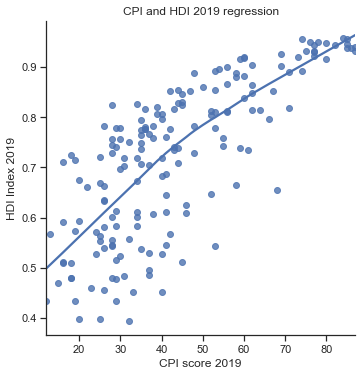

In [187]:
sns.lmplot(x="CPI score 2019", y="HDI_index-2019", data=df1, lowess = True, palette="muted")

plt.title('CPI and HDI 2019 regression')
plt.xlabel('CPI score 2019')
plt.ylabel('HDI Index 2019')
plt.show()

If CPI score is increasing (curruption is decreasing), HDI is increasing too. Over a given point (somewhere around CPI=40), the higher corruption score results less higher HDI on average.

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

For further analysis, we check if we have missing values in CPI score or HDI. We do have missing values in HDI so we drop those observations.

In [92]:
df1.isnull().any()

Country                         False
ISO3                            False
Region                          False
CPI score 2019                  False
Rank 2019                       False
CPI score 2016                   True
Rank 2016                        True
Employment_ratio-2016            True
Employment_ratio-2019            True
GDP_per_capita-2016              True
GDP_per_capita-2019              True
HDI_index-2016                   True
HDI_index-2019                   True
Women_in_parliament_(%)-2016     True
Women_in_parliament_(%)-2019     True
dtype: bool

In [93]:
df1 = df1.dropna(subset=['HDI_index-2019','CPI score 2019'])

We set CPI score 2019 as explanatory variable and HDI as dependent variable.

In [94]:
X = df1[["CPI score 2019"]].values
y = df1["HDI_index-2019"].values

#### Let's see the distribution of HDI on the plot below.

D:\Programok\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



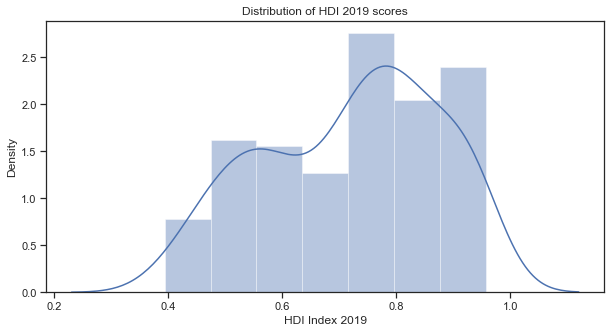

In [184]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df1['HDI_index-2019'])

plt.title('Distribution of HDI 2019 scores')
plt.xlabel('HDI Index 2019')
plt.show()


Next, we split 80% of the data to training set while 20% of the data to test set using below code.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [97]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
regressor.coef_, X

(array([0.00635913]),
 array([[87],
        [87],
        [86],
        [85],
        [85],
        [85],
        [84],
        [82],
        [80],
        [80],
        [77],
        [77],
        [77],
        [76],
        [75],
        [77],
        [78],
        [74],
        [73],
        [74],
        [71],
        [71],
        [69],
        [68],
        [69],
        [67],
        [66],
        [62],
        [64],
        [62],
        [62],
        [62],
        [59],
        [60],
        [60],
        [61],
        [60],
        [60],
        [59],
        [58],
        [56],
        [56],
        [58],
        [58],
        [55],
        [56],
        [55],
        [56],
        [53],
        [52],
        [53],
        [54],
        [52],
        [53],
        [53],
        [52],
        [53],
        [48],
        [50],
        [48],
        [42],
        [47],
        [48],
        [46],
        [45],
        [45],
        [45],
        [44],
        [44],
        [44]

Based on the regression above, we can see that the coefficient is 0.00635913, which means that if the corruption score is increased by 1, the HDI is increased by 0.00635913 on average.

Let's make a prediction based on CPI score 2019 to see, how good predictor corruption is for HDI.

In [99]:
y_pred = regressor.predict(X_test)

In [100]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_pred1 = df_pred.head(25)

df_pred

,Actual,Predicted
0,0.854,0.779118
1,0.539,0.607421
2,0.625,0.734604
3,0.646,0.772759
4,0.557,0.645576
5,0.496,0.677372
6,0.944,0.963533
7,0.594,0.569267
8,0.824,0.620140
9,0.796,0.696449


#### Based on the metrics below, corruption can be a meaningful predictor of HDI. 

We can see that the model RMSE is 0.103, which means if we predict HDI based on CPI the average margin of error is approximately 0.103. 

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08539228748237408
Mean Squared Error: 0.010544943682237006
Root Mean Squared Error: 0.10268857620123577


## Task 2

In task 2, we would like to explore how the selected indicators changed of the top 10 countries regarding improvement in CPI ranking. Ranking improvement is defined by the difference between CPI Rank 2016 and CPI Rank 2019. The ranking improvement can be found below in the "CPI_Rank_difference" column of the table.

In [102]:
df1['CPI_Rank_difference'] = df1["Rank 2016"]-df1["Rank 2019"]
df1.sort_values(by=['CPI_Rank_difference'], ascending = False)

,Country,ISO3,Region,CPI score 2019,Rank 2019,CPI score 2016,Rank 2016,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019,CPI_Rank_difference
101,Gambia,GMB,SSA,37,96,26.0,145.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345,49.0
60,Armenia,ARM,ECA,42,77,33.0,113.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485,36.0
80,Argentina,ARG,AME,45,66,36.0,95.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877,29.0
91,Ecuador,ECU,AME,38,93,31.0,120.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956,27.0
83,Guyana,GUY,AME,40,85,34.0,108.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Liberia,LBR,SSA,28,137,37.0,90.0,74.393,74.167,1516.356,1427.819,0.478,0.480,10.680,11.650,-47.0
26,Seychelles,SYC,SSA,66,27,NaN,NaN,NaN,NaN,26421.941,29055.749,0.787,0.796,21.212,21.212,NaN
75,Vanuatu,VUT,AP,46,64,NaN,NaN,66.791,66.811,3066.322,3143.628,0.598,0.609,0.100,0.100,NaN
119,Eswatini,SWZ,SSA,34,113,NaN,NaN,39.917,40.910,8405.799,8688.101,0.588,0.611,14.737,12.121,NaN


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

Let's see the countries, which managed to jumped forward the most in the CPI ranking from 2016 to 2019.

In [105]:
ranking = df1[["Country", "CPI_Rank_difference"]].sort_values(by=['CPI_Rank_difference'], ascending = False ).reset_index(drop = True).head(10)
ranking = ranking.set_index('Country')
ranking

,CPI_Rank_difference
Country,
Gambia,49.0
Armenia,36.0
Argentina,29.0
Ecuador,27.0
Guyana,23.0
Tanzania,20.0
Nepal,18.0
Kazakhstan,18.0
Angola,18.0


#### Plotting the CPI Rank Improvement of the top 10 success stories 

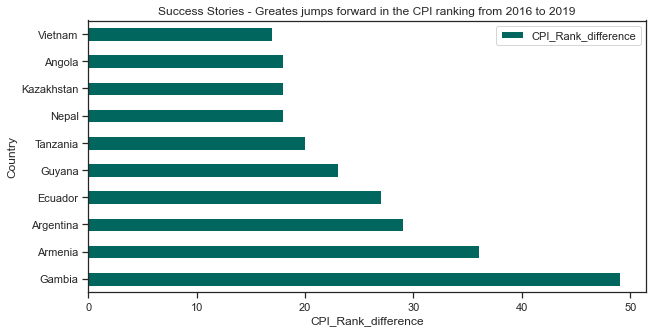

In [168]:
ranking.plot(figsize=(10,5), kind = 'barh', color = '#01665e')

plt.title('Success Stories - Greates jumps forward in the CPI ranking from 2016 to 2019')
plt.ylabel('Country')
plt.xlabel('CPI_Rank_difference')
plt.show()

Let's see some other indicators - what has changed together with the CPI ranking improvement?

In [109]:
df_top = df1[["Country", "CPI_Rank_difference", "Employment_ratio-2016", "Employment_ratio-2019", "GDP_per_capita-2016", "GDP_per_capita-2019", "HDI_index-2016", "HDI_index-2019", "Women_in_parliament_(%)-2016", "Women_in_parliament_(%)-2019"]].sort_values(by=['CPI_Rank_difference'], ascending = False ).reset_index(drop = True).head(10)
df_top = df_top.set_index('Country')
df_top

,CPI_Rank_difference,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019
Country,,,,,,,,,
Gambia,49.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345
Armenia,36.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485
Argentina,29.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877
Ecuador,27.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956
Guyana,23.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884
Tanzania,20.0,82.023,81.761,2441.565,2660.420,0.520,0.529,36.559,36.896
Nepal,18.0,82.180,82.626,2902.249,3416.791,0.586,0.602,29.580,33.533
Kazakhstan,18.0,66.647,65.601,24210.863,26351.439,0.808,0.825,20.779,22.078
Angola,18.0,71.983,72.157,7568.997,6653.908,0.578,0.581,36.818,30.000


#### Employment Ratio

Create a separate table for the employment ratio

In [113]:
df_top_emp = df_top[["Employment_ratio-2016", "Employment_ratio-2019"]]
df_top_emp

,Employment_ratio-2016,Employment_ratio-2019
Country,,
Gambia,53.679,54.021
Armenia,46.097,46.173
Argentina,55.500,55.301
Ecuador,65.264,65.338
Guyana,49.419,49.524
Tanzania,82.023,81.761
Nepal,82.180,82.626
Kazakhstan,66.647,65.601
Angola,71.983,72.157


#### Plotting the Employment ratio change of the top 10 success stories

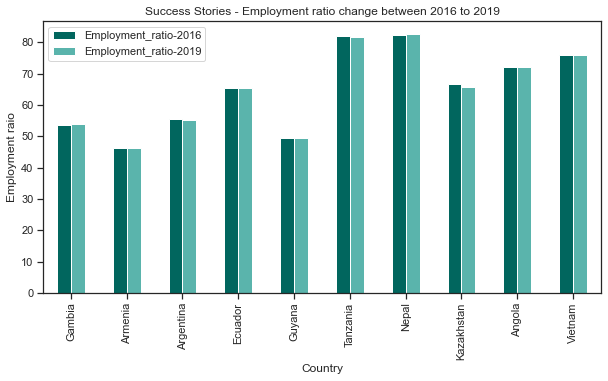

In [170]:
df_top_emp.plot.bar(figsize=(10,5), color = ('#01665e', '#5ab4ac'))

plt.title('Success Stories - Employment ratio change between 2016 to 2019')
plt.xlabel('Country')
plt.ylabel('Employment raio')
plt.show()

The employment ratio did not changed during the observed period, so we can state that this is not a key element of CPI improvement.

#### GDP per capita

Create a separate table for the gdp per capita

In [171]:
df_top_gdp = df_top[["GDP_per_capita-2016", "GDP_per_capita-2019"]]
df_top_gdp

,GDP_per_capita-2016,GDP_per_capita-2019
Country,,
Gambia,2036.872,2206.913
Armenia,11303.072,13653.750
Argentina,23189.731,22033.945
Ecuador,11551.617,11375.331
Guyana,8848.151,9702.579
Tanzania,2441.565,2660.420
Nepal,2902.249,3416.791
Kazakhstan,24210.863,26351.439
Angola,7568.997,6653.908


#### Plotting the GDP per capita of the top 10 success stories¶

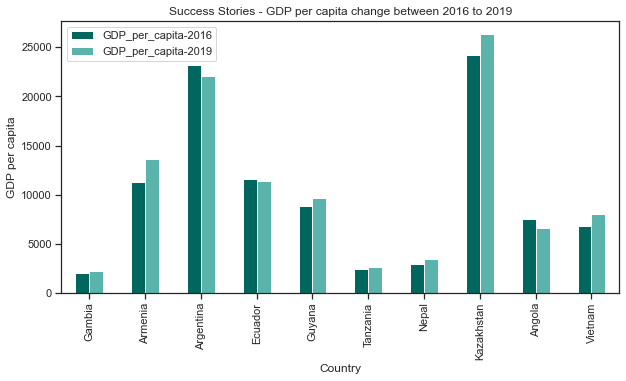

In [175]:
df_top_gdp.plot.bar(figsize=(10,5), color = ('#01665e', '#5ab4ac'))

plt.title('Success Stories - GDP per capita change between 2016 to 2019')
plt.xlabel('Country')
plt.ylabel('GDP per capita')
plt.show()

Surprisingly, there are large differences in the GDP per capita values of the top 10 success stories.

#### GDP per capita percentage change between 2016 - 2019

In [173]:
df_top_gdp_change = df_top[["GDP_per_capita-2016", "GDP_per_capita-2019"]]
df_top_gdp
df_top_gdp_change['GDP_pc_%_change'] = df_top_gdp_change["GDP_per_capita-2019"] / df_top_gdp_change["GDP_per_capita-2016"] -1
df_top_gdp_change = df_top_gdp_change.drop(columns = ['GDP_per_capita-2019', 'GDP_per_capita-2016'])
df_top_gdp_change

<ipython-input-173-77ff38cc3bdf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GDP_pc_%_change
Country,
Gambia,0.083481
Armenia,0.207968
Argentina,-0.049840
Ecuador,-0.015261
Guyana,0.096566
Tanzania,0.089637
Nepal,0.177291
Kazakhstan,0.088414
Angola,-0.120900


#### Plotting the GDP per capita change of the top 10 success stories

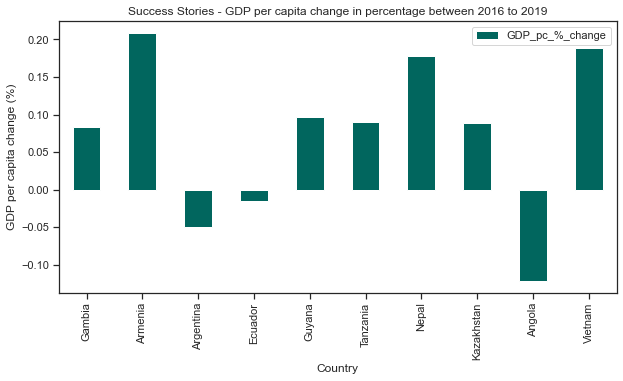

In [178]:
df_top_gdp_change.plot.bar(figsize=(10,5), color = '#01665e')

plt.title('Success Stories - GDP per capita change in percentage between 2016 to 2019')
plt.xlabel('Country')
plt.ylabel('GDP per capita change (%)')
plt.show()

It seems that GDP per capita percentage change does not improve together with the CPI score in 2019.

#### Share of women in parliament change between 2016 - 2019

Create a separate table for women in parliament data

In [160]:
df_top_wom = df_top[["Women_in_parliament_(%)-2016", "Women_in_parliament_(%)-2019"]]
df_top_wom

,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019
Country,,
Gambia,9.434,10.345
Armenia,10.687,23.485
Argentina,37.082,39.877
Ecuador,41.606,37.956
Guyana,30.435,31.884
Tanzania,36.559,36.896
Nepal,29.580,33.533
Kazakhstan,20.779,22.078
Angola,36.818,30.000


#### Plotting the change of Women in parliament (%)

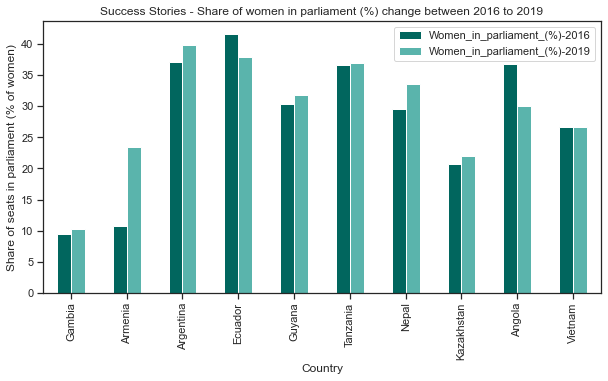

In [180]:
df_top_wom.plot.bar(figsize=(10,5), color = ('#01665e', '#5ab4ac'))

plt.title('Success Stories - Share of women in parliament (%) change between 2016 to 2019')
plt.xlabel('Country')
plt.ylabel('Share of seats in parliament (% of women)')
plt.show()

Unfortunately, there are large differences in the share of women in parliament between the success stories. We can see that in Armenia there was a huge increase in the share of women, meanwhile in Angola there was a significant drop.